In [1]:
import numpy as np


# import sys
# sys.path.append('../') # scattering is not in my default path

from scattering import scatterer
from scattering import Rayleigh

In [2]:
try:
    generic = scatterer.scatterer()
except:
    pass
try:
    ray = Rayleigh.Rayleigh()
except:
    pass
try:
    TM = scatterer.T_Matrix()
except:
    pass
try:
    Mie = scatterer.Mie()
except:
    pass
#ray.back_spec

In [3]:
ray = Rayleigh.Rayleigh(frequency=1.0e9,dielectric_permittivity=complex(6.0,1.0))
ray.set_scattering_geometry([0.5*np.pi, 0.0, 0.5*np.pi, np.pi])
ray.set_scattering_geometry([0.5*np.pi, 0.0, 0.5*np.pi, 0.0])
ray.set_scattering_geometry([0.0, 0.0, np.pi, 0.0])
ray.set_scattering_geometry([np.pi, 0.0, np.pi, 0.0])

ValueError: not enough values to unpack (expected 6, got 4)

In [ ]:
%debug

In [ ]:
print(ray.wavelength,ray.Cbck)

In [ ]:
8.0*ray.size_parameter**4*ray.K2*ray.geometric_cross_section/3.0

In [ ]:
ray.Cabs

In [ ]:
print(ray.theta_inc,ray.theta_sca,ray.phi_inc,ray.phi_sca)
ray.scatt_angle


In [4]:
%matplotlib inline

/Volumes/User/mmaahn/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


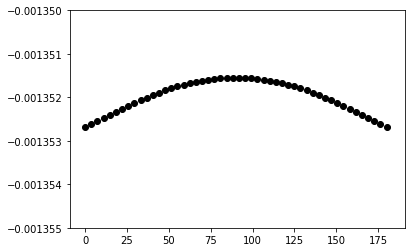

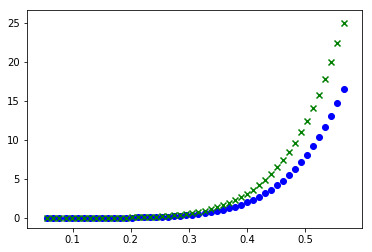

In [6]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

from pytmatrix import tmatrix
from pytmatrix import tmatrix_aux
from pytmatrix import refractive
from pytmatrix import scatter
import matplotlib.pyplot as plt

import numpy as np

import sys
sys.path.append('../')

wl = tmatrix_aux.wl_S
m = refractive.mi(tmatrix_aux.wl_S,refractive.ice_density)

pi5 = np.pi**5.0
wl4 = wl**4.0
K = (m**2+1.0)/(m**2-2)
K2 = (K*K.conj()).real
pref = pi5*K2/wl4

scatt = tmatrix.Scatterer(radius=1.0,
                          wavelength=wl,
                          m=m,
                          axis_ratio=1.0)

plt.figure()
ax = plt.gca()
for th in np.linspace(0.0,180):
    scatt.thet = th
    [[S11,S12],[S21,S22]] = scatt.get_S()
    sig = scatter.sca_xsect(scatt)
#    ax.scatter(th,1e6*sig,c='m')
    ax.scatter(th,S11,c='b')
    ax.scatter(th,S12,c='r')
    ax.scatter(th,S21,c='g',marker='x')
    ax.scatter(th,S22,c='k')
ax.set_ylim([-0.0015,0.0015])
ax.set_ylim([-0.001355,-0.00135])

plt.figure()
ax = plt.gca()
for s in np.linspace(1,10,50):
    scatt = tmatrix.Scatterer(radius=s,
                              wavelength=wl,
                              m=m,
                              axis_ratio=1.0)
    R = pref * s**6.0
    ax.scatter(2*np.pi*s/wl,scatter.sca_xsect(scatt),c='b')
    ax.scatter(2*np.pi*s/wl,R,c='g',marker='x')